In [1]:
# load the raw dataset
import numpy as np
import pandas as pd
from pandas import DataFrame

rawdf = pd.read_csv("unc.edu_PANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv", sep="\t", index_col=0)
rawdf.head()

,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J7-01A-11R-A29S-07,TCGA-OR-A5J8-01A-11R-A29S-07,TCGA-OR-A5J9-01A-11R-A29S-07,TCGA-OR-A5JA-01A-11R-A29S-07,TCGA-OR-A5JB-01A-11R-A29S-07,...,TCGA-VQ-AA6A-01A-11R-A414-31,TCGA-VQ-AA6B-01A-11R-A414-31,TCGA-VQ-AA6D-01A-11R-A414-31,TCGA-VQ-AA6F-01A-31R-A414-31,TCGA-VQ-AA6G-01A-11R-A414-31,TCGA-VQ-AA6I-01A-11R-A414-31,TCGA-VQ-AA6J-01A-11R-A414-31,TCGA-VQ-AA6K-01A-11R-A414-31,TCGA-ZA-A8F6-01A-23R-A36D-31,TCGA-ZQ-A9CR-01A-11R-A39E-31
0.0gene_id,,,,,,,,,,,,,,,,,,,,,
?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.3189,0.0000,0.0000,0.0000,0.0000,0.2466,0.4134,0.0000,0.5668
?|100133144,3.2661,2.6815,1.7301,0.0000,0.0000,1.1673,1.4422,0.0000,4.4556,7.1293,...,26.1744,28.1937,32.4153,18.6091,33.7625,35.0189,27.6770,28.6855,29.3939,19.8016
?|100134869,3.9385,8.9948,6.5650,1.5492,4.4709,6.0529,2.2876,1.3599,5.0581,0.0000,...,14.3662,16.5156,21.5482,17.2753,20.2653,30.1605,19.2494,21.1378,15.4703,8.5379
?|10357,149.1350,81.0777,86.4879,53.9117,66.9063,103.5060,94.9316,78.1955,69.2389,155.7090,...,11.5541,10.0447,15.9546,21.9117,8.4115,21.6463,35.6665,11.5371,22.0386,29.3701
?|10431,2034.1000,1304.9300,1054.6600,2350.8900,1257.9900,1866.4300,995.0270,1762.1200,1213.5300,2005.5700,...,357.7860,780.6260,903.2380,1033.0300,733.7430,519.9930,709.6430,702.4730,561.9840,1874.0200


In [2]:
# transpose raw dataset so row is patient samples and column is list of genes
processeddf = rawdf.transpose()
# load class label
dflabels = pd.read_csv('project_class_labels_original_10471.csv',index_col='Unnamed: 0')

In [3]:
# check to see if there is any feature (i.e. column) has all zero values so we will delete them
removedAllZeroColdf = processeddf.loc[:, (processeddf != 0).any(axis=0)]
removedAllZeroColdf.shape

(10471, 20319)

In [4]:
# data scaling
# method 1 : standardization
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
stdscalerfit = stdscaler.fit_transform(removedAllZeroColdf)

stddf = DataFrame(stdscalerfit,index = removedAllZeroColdf.index, columns = removedAllZeroColdf.columns)
stddf.head()

0.0gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
TCGA-OR-A5J1-01A-11R-A29S-07,-0.160942,-0.617169,-0.576054,0.381991,2.670834,-0.031973,0.157343,0.840137,-0.110518,-0.018862,...,-1.119447,-0.275935,-0.226144,-0.323150,-0.613014,-0.890816,-0.239301,-0.498587,1.137707,-0.120793
TCGA-OR-A5J2-01A-11R-A29S-07,-0.160942,-0.660038,-0.245485,-0.530733,0.869174,-0.031973,-0.178775,-0.612835,-0.110518,-0.018862,...,0.030730,-0.592270,3.777421,-0.148785,0.441277,-0.537709,0.802185,0.105872,0.858771,-0.139824
TCGA-OR-A5J3-01A-11R-A29S-07,-0.160942,-0.729806,-0.404340,-0.458176,0.250798,-0.031973,0.489805,-0.015371,-0.110518,-0.018862,...,-0.519653,0.350741,-0.508585,-0.322517,-0.291222,-0.654849,0.218941,-0.965491,-0.089382,-0.153554
TCGA-OR-A5J5-01A-11R-A29S-07,-0.160942,-0.856677,-0.732261,-0.895059,3.453570,-0.031973,0.896991,0.168255,-0.110518,-0.018862,...,-1.208814,-0.910432,-0.558491,-0.260347,-0.805662,-0.738183,-0.263757,-0.743461,1.428387,-0.153554
TCGA-OR-A5J6-01A-31R-A29S-07,-0.160942,-0.856677,-0.541247,-0.720787,0.753193,-0.031973,-0.403383,-0.612835,-0.110518,-0.018862,...,-1.365085,-1.294606,-0.550297,-0.281743,-0.312786,-1.219005,-0.748683,-0.852823,0.247311,-0.153554


In [5]:
# split 80% training set; 20% testing set
from sklearn.model_selection import train_test_split

trainData, testData, trainLabel, testLabel = train_test_split(stddf, dflabels, test_size=0.20)

Accuracy Score (k =  1 ): 0.877326968974
Accuracy Score (k =  5 ): 0.886873508353
Accuracy Score (k =  10 ): 0.87923627685
Accuracy Score (k =  25 ): 0.852505966587
Accuracy Score (k =  50 ): 0.828639618138


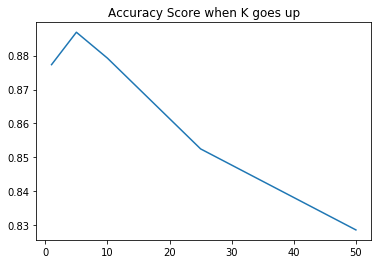

In [7]:
# optimization of number of neighbor
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

numberOfNeighbors = [1, 5, 10, 25, 50]
results=[]

for i in numberOfNeighbors:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(trainData, trainLabel.values.ravel())
    pred = clf.predict(testData)
    accuracy = accuracy_score(testLabel, pred)
    print("Accuracy Score (k = ", i,"):", accuracy)
    results.append([i,accuracy])
    
    
resultsMatrix = pd.DataFrame(results, columns=["i","accuracy"])

pl.plot(resultsMatrix.i, resultsMatrix.accuracy)
pl.title("Accuracy Score when K goes up")
pl.show()

In [9]:
# distance wrighting function; k = 5

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

import time


clf_weighted = KNeighborsClassifier(n_neighbors=5,weights='distance')
start = time.time()
clf_weighted.fit(trainData, trainLabel.values.ravel())
end = time.time()
print("5 nearest neighbor (normal) training time: ", end - start)

pred = clf_weighted.predict(testData)
accuracy = accuracy_score(testLabel, pred)
print("Accuracy Score (distance weighted) k = 5:", accuracy)

# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testLabel, pred)
print(confusion_matrix)
# classficiation report
from sklearn.metrics import classification_report
print(classification_report(testLabel, pred))

5 nearest neighbor (normal) training time:  30.751182079315186
Accuracy Score (distance weighted) k = 5: 0.892124105012
[[ 13   0   0 ...,   0   0   0]
 [  0  62   1 ...,   0   0   0]
 [  0   1 234 ...,   0   0   0]
 ..., 
 [  0   0   1 ...,  32   0   0]
 [  0   0   1 ...,   5  11   0]
 [  0   0   0 ...,   0   0  14]]
             precision    recall  f1-score   support

        ACC       1.00      1.00      1.00        13
       BLCA       0.86      0.81      0.83        77
       BRCA       0.94      0.98      0.96       238
       CESC       0.88      0.82      0.85        68
       CHOL       0.80      0.44      0.57         9
       COAD       0.63      0.93      0.75        59
       DLBC       0.88      1.00      0.93         7
       ESCA       0.75      0.33      0.46        36
        GBM       0.78      0.95      0.85        37
       HNSC       0.90      0.85      0.88       110
       KICH       0.74      0.74      0.74        19
       KIRC       0.97      0.94      0.96 